In [94]:
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/iterative_alternative/analyze_mecp2_cpg_enrichment')


# Serial


In [95]:
# Read the input file
df_serial = pd.read_csv('mecp2_cpg_enrichment/mecp2_cpg_enrichment.csv')
print(f"Total regions: {len(df_serial)}")


Total regions: 17017


In [96]:
np.sum(df_serial['significant'])

21

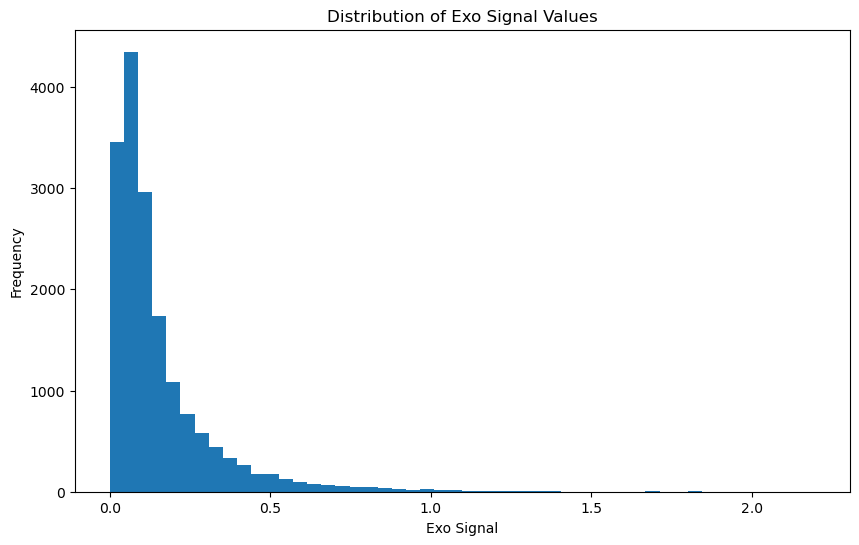

In [97]:
plt.figure(figsize=(10,6))
plt.hist(df_serial['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

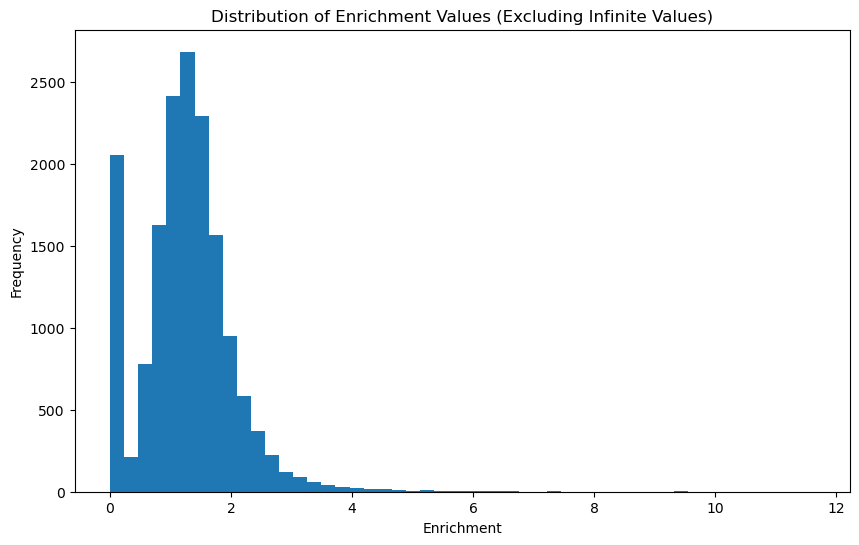

In [98]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [99]:
df_serial.loc[df_serial['enrichment'] == float('inf'), 'enrichment'] = 10

In [100]:
df_serial = df_serial[df_serial['exo_signal'] > 0.1]

In [101]:
df_serial.head()

,chr,start,end,exo_signal,endo_signal,enrichment,n_exo_peaks,n_endo_peaks,significant
2,chr1,3671654,3672156,0.262051,0.299416,0.875208,6,5,False
3,chr1,4491701,4493673,0.121103,0.081867,1.479262,6,5,False
7,chr1,4785376,4785814,0.354838,0.278872,1.272405,6,5,False
9,chr1,4857465,4858372,0.639017,0.281745,2.268067,6,5,False
10,chr1,5018557,5019711,0.119492,0.067396,1.772989,6,5,False


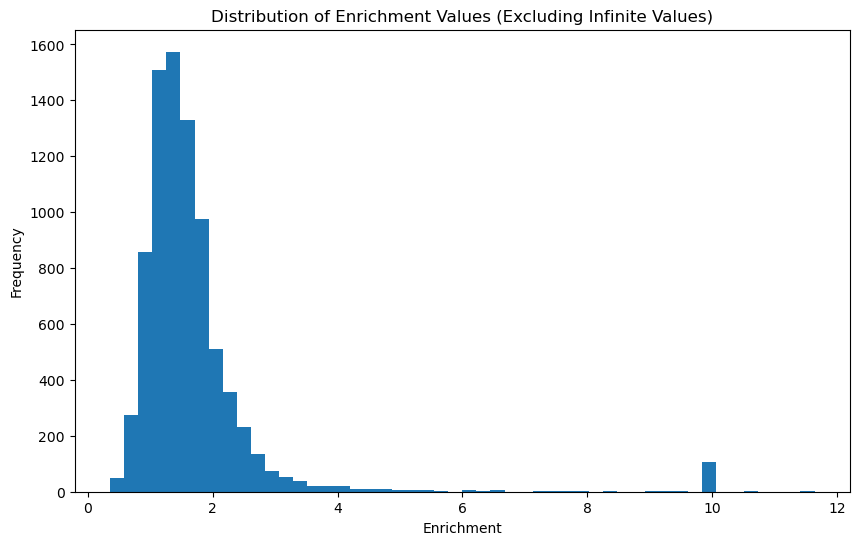

In [102]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [103]:
df_serial = df_serial.sort_values('enrichment', ascending=False)

In [104]:
df_serial.head()

,chr,start,end,exo_signal,endo_signal,enrichment,n_exo_peaks,n_endo_peaks,significant
14118,chr8,70754903,70755261,0.215294,0.018493,11.641609,6,5,False
1137,chr10,68276999,68277311,0.138340,0.013027,10.619224,6,5,False
1505,chr10,112270163,112270423,0.100715,0.000000,10.000000,6,5,False
13911,chr8,25676543,25676764,0.139889,0.000000,10.000000,6,5,False
13904,chr8,25101927,25102511,0.114107,0.000000,10.000000,6,5,False


# Parallel


In [105]:
# Get list of all chunk files
chunk_files = glob.glob('mecp2_cpg_enrichment_parallel/chunk_*.csv')
chunk_files

['mecp2_cpg_enrichment_parallel/chunk_1.csv',
 'mecp2_cpg_enrichment_parallel/chunk_7.csv',
 'mecp2_cpg_enrichment_parallel/chunk_6.csv',
 'mecp2_cpg_enrichment_parallel/chunk_4.csv',
 'mecp2_cpg_enrichment_parallel/chunk_8.csv',
 'mecp2_cpg_enrichment_parallel/chunk_2.csv',
 'mecp2_cpg_enrichment_parallel/chunk_5.csv',
 'mecp2_cpg_enrichment_parallel/chunk_0.csv',
 'mecp2_cpg_enrichment_parallel/chunk_3.csv',
 'mecp2_cpg_enrichment_parallel/chunk_9.csv']

In [106]:
# Read and concatenate all chunks
df_parallel = pd.concat([pd.read_csv(f) for f in chunk_files], ignore_index=True)

# Sort by chromosome and start position
df_parallel = df_parallel.sort_values(['chr', 'start'])

print(f"Total regions analyzed: {len(df_parallel)}")

Total regions analyzed: 17017


In [107]:
df_parallel.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
11907,chr1,3531624,3531843,0.000000,0.021891,0.000000,False
11908,chr1,3670619,3671074,0.063829,0.119452,0.534353,False
11909,chr1,3671654,3672156,0.218376,0.179650,1.215567,False
11910,chr1,4491701,4493673,0.040368,0.016373,2.465437,False
11911,chr1,4496947,4497608,0.000000,0.007070,0.000000,False


In [108]:
np.sum(df_parallel['significant'] == True)

22

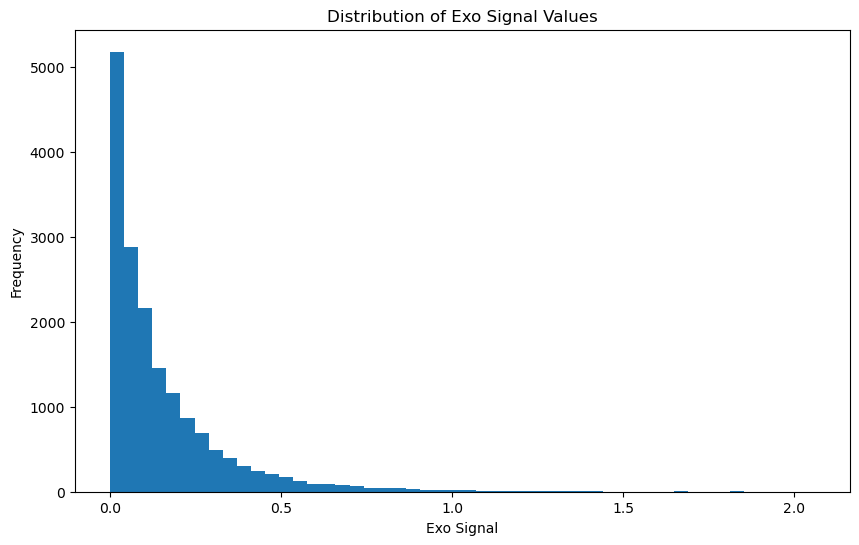

In [109]:
plt.figure(figsize=(10,6))
plt.hist(df_parallel['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

In [110]:
df_parallel.loc[df_parallel['enrichment'] == float('inf'), 'enrichment'] = 25

In [111]:
df_parallel = df_parallel[df_parallel['exo_signal'] > 0.1]

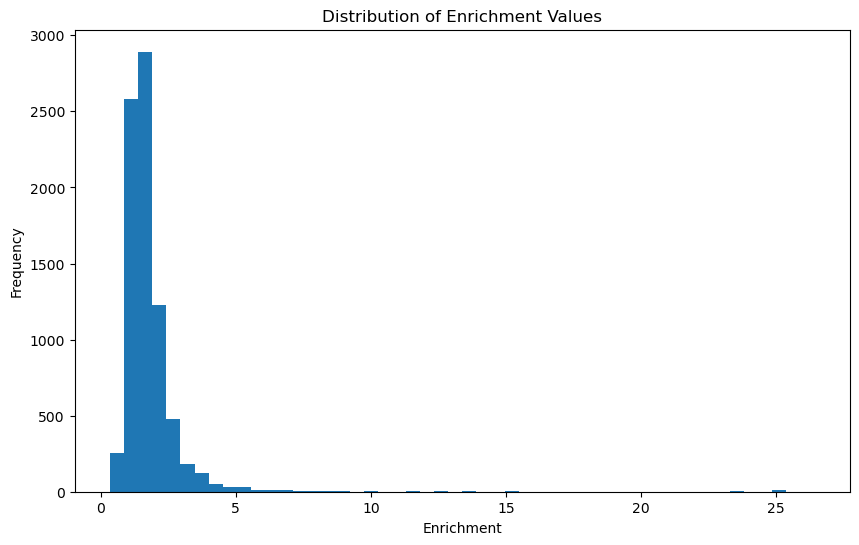

In [112]:
plt.figure(figsize=(10,6))
plt.hist(df_parallel['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values')
plt.show()

In [113]:
df_parallel = df_parallel.sort_values('enrichment', ascending=False)
df_parallel.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
4208,chr5,35525417,35525676,0.104553,0.003956,26.427297,False
15891,chrX,135008815,135009106,0.230176,0.000000,25.000000,False
6910,chr7,141070293,141071018,0.118437,0.000000,25.000000,False
9558,chr14,52009117,52009656,0.118184,0.000000,25.000000,False
13737,chr15,89140089,89140792,0.109188,0.000000,25.000000,False


In [114]:
df_parallel['significant'] = True

In [115]:
df_parallel.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
4208,chr5,35525417,35525676,0.104553,0.003956,26.427297,True
15891,chrX,135008815,135009106,0.230176,0.000000,25.000000,True
6910,chr7,141070293,141071018,0.118437,0.000000,25.000000,True
9558,chr14,52009117,52009656,0.118184,0.000000,25.000000,True
13737,chr15,89140089,89140792,0.109188,0.000000,25.000000,True


In [116]:
df_parallel.to_csv('mecp2_cpg_enrichment_parallel/mecp2_cpg_enrichment_parallel.csv', index=False)